# Dataset analysis

In this notebook, we analyze the datasets properties:
* Users
* Resources
* Attributes
* Size
* Positive Access requests
* Negative Access requests
* Number of rules
* Avg. size of rules

In [35]:
### Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
### User and resource attributes for each dataset

DS_ID = "IoT" # Availables => user_attributes.keys()
# OUT_FILE = open(DS_ID+".output", "w") # File to save the outputs

USER_ATTRS = {"IoT": ["role", "age", "health", "uname"],
              "AMZ": ["MGR_ID","ROLE_ROLLUP_1","ROLE_ROLLUP_2","ROLE_DEPTNAME","ROLE_TITLE","ROLE_FAMILY_DESC","ROLE_FAMILY","ROLE_CODE"],
              "HC": ["position", "uward", "specialties", "teams", "agentfor", "uname"],
              "UN": ["position","departmentu","crsTaken","crsTaught","isChair", "uname"],
              "PM": ["adminroles","projects","departmentu","projectsled","expertiseu","isemployee","task","uname"]}

RES_ATTRS = {"IoT": ["area", "mode", "temperature", "lockstatus", "rname"],
             "AMZ":["RID"],
             "HC": ["type", "author", "patient", "topics", "tratingTeam", "rward", "rname"],
             "UN": ["type","student","departmentr","csr", "rname"],
             "PM": ["type","project","department","expertise","proprietary", "rname"]}

EDG_ATTRS = {"IoT": ["uname", "rname", "location", "timeday", "op", "ACTION"],
             "AMZ": ["uname", "rname"],
             "HC": ["uname", "rname"],
             "UN":["uname", "rname"],
             "PM":["uname", "rname"]}


In [71]:
str_dataset = "AMZ"
filename = "../data/"+str_dataset+"/0-"+str_dataset+"-universal.csv"

acc_log = pd.read_csv(filename)

# Remove first column (is the old index)
acc_log = acc_log[acc_log.columns[1:]]

# Change the uname string values to int values
acc_log = acc_log.replace(acc_log.uname.unique(), range(len(acc_log.uname.unique())))

# Change the resource id
if not str_dataset in ["UN", "PM"]:
    acc_log["rname"] = acc_log["rname"] + max(acc_log.uname.unique()) + 1

print("Done!")
print(acc_log.head(5)) # Show the first five rows

# Delete some variables
del filename

AttributeError: 'DataFrame' object has no attribute 'uname'

In [77]:
str_dataset = "ML"
filename = "../data/"+str_dataset+"/0-"+str_dataset+"-universal.csv"

acc_log = pd.read_csv(filename)

# Change the uname string values to int values
#acc_log = acc_log.replace(acc_log.uname.unique(), range(len(acc_log.uname.unique())))

# Change the resource id
#if n#ot str_dataset == "PM":
#    acc_log["rname"] = acc_log["rname"] + max(acc_log.uname.unique()) + 1

print("Done!")
print(acc_log.head(5)) # Show the first five rows

# Delete some variables
del filename

Done!
   uname  rname  rating       time
0    196    242       3  881250949
1    186    302       3  891717742
2     22    377       1  878887116
3    244     51       2  880606923
4    166    346       1  886397596


In [28]:
### Properties

print("Number of users: \t", len(acc_log["uname"].drop_duplicates()))
print("Number of Resources: \t", len(acc_log["rname"].drop_duplicates()))
#print("User Attrs: \t", len(USER_ATTRS[str_dataset]))
#print("Rscs Attrs: \t", len(RES_ATTRS[str_dataset]))
print("Size of AL: \t", len(acc_log))
#print("Size of +AL: \t", len(acc_log[acc_log.ACTION==1]))
#print("Size of -AL: \t", len(acc_log[acc_log.ACTION==0]))

Number of users: 	 943
Number of Resources: 	 1682
Size of AL: 	 100000


In [68]:
### Properties

print("Number of users: \t", len(acc_log[USER_ATTRS[str_dataset]].drop_duplicates()))
print("Number of Resources: \t", len(acc_log[RES_ATTRS[str_dataset]].drop_duplicates()))
print("User Attrs: \t", len(USER_ATTRS[str_dataset]))
print("Rscs Attrs: \t", len(RES_ATTRS[str_dataset]))
print("Size of AL: \t", len(acc_log))
print("Size of +AL: \t", len(acc_log[acc_log.ACTION==1]))
print("Size of -AL: \t", len(acc_log[acc_log.ACTION==0]))

Number of users: 	 120
Number of Resources: 	 990
User Attrs: 	 4
Rscs Attrs: 	 5
Size of AL: 	 5702400
Size of +AL: 	 4276800
Size of -AL: 	 1425600


In [29]:
def resize_distribution(prob_distribution, new_size):
    """
    Resize the probability distribution to a new size using linear interpolation.

    Parameters:
    - prob_distribution (list): The original probability distribution.
    - new_size (int): The desired size of the new probability distribution.

    Returns:
    - list: The resized probability distribution.
    """
    old_size = len(prob_distribution)

    # Create indices for the old and new arrays
    old_indices = np.linspace(0, old_size - 1, old_size)
    new_indices = np.linspace(0, old_size - 1, new_size)

    # Use linear interpolation to resize the distribution
    resized_distribution = np.interp(new_indices, old_indices, prob_distribution)

    # Normalize the distribution to ensure it sums to 1
    resized_distribution /= sum(resized_distribution)

    return resized_distribution


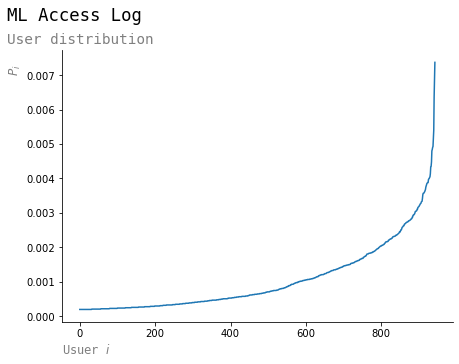

In [78]:
### User distribution

fig, ax = plt.subplots(figsize=(7, 5))
ax.spines[['right', 'top']].set_visible(False)
to_plot = acc_log["uname"].value_counts(normalize=True, ascending=True)
#to_plot = acc_log[USER_ATTRS[str_dataset]].value_counts(normalize=True, ascending=True)
ax.plot(range(len(to_plot)), to_plot)
ax.set_xlabel('Usuer $i$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_i$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("User distribution", loc='left', size="x-large", family='monospace', x=-0.14, y=1, alpha=0.5)
plt.suptitle(str_dataset+" Access Log", size="xx-large", family='monospace', x=0.15, y=1)
plt.show()

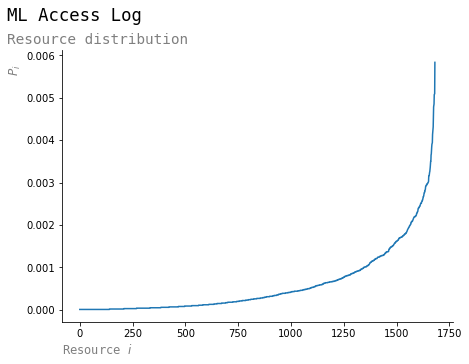

In [79]:
### User distribution

fig, ax = plt.subplots(figsize=(7, 5))
ax.spines[['right', 'top']].set_visible(False)
to_plot = acc_log["rname"].value_counts(normalize=True, ascending=True)
ax.plot(range(len(to_plot)), to_plot)
ax.set_xlabel('Resource $i$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_i$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Resource distribution", loc='left', size="x-large", family='monospace', x=-0.14, y=1, alpha=0.5)
plt.suptitle(str_dataset+" Access Log", size="xx-large", family='monospace', x=0.15, y=1)
plt.show()